Nama : Andri Setiawan <br>
NIM : 211351018<br>
Kelas : IF Malam B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrisetiawan01","key":"5a5a85c20ec4ccae72a2bedd43435b76"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d irfanasrullah/groceries

100% 168k/168k [00:00<00:00, 483kB/s]
100% 168k/168k [00:00<00:00, 483kB/s]


In [4]:
!mkdir groceries
!unzip groceries.zip -d groceries
!ls groceries

Archive:  groceries.zip
  inflating: groceries/groceries - groceries.csv  
  inflating: groceries/groceries.csv  
 groceries.csv	'groceries - groceries.csv'


# import library yang digunakan

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Discovery

In [7]:
df = pd.read_csv("/content/groceries/groceries - groceries.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 33 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item(s)       0
Item 1        0
Item 2     2159
Item 3     3802
Item 4     5101
Item 5     6106
Item 6     6961
Item 7     7606
Item 8     8151
Item 9     8589
Item 10    8939
Item 11    9185
Item 12    9367
Item 13    9484
Item 14    9562
Item 15    9639
Item 16    9694
Item 17    9740
Item 18    9769
Item 19    9783
Item 20    9797
Item 21    9806
Item 22    9817
Item 23    9821
Item 24    9827
Item 25    9828
Item 26    9828
Item 27    9829
Item 28    9830
Item 29    9831
Item 30    9834
Item 31    9834
Item 32    9834
dtype: int64

# EDA (minimal 5) dan Preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


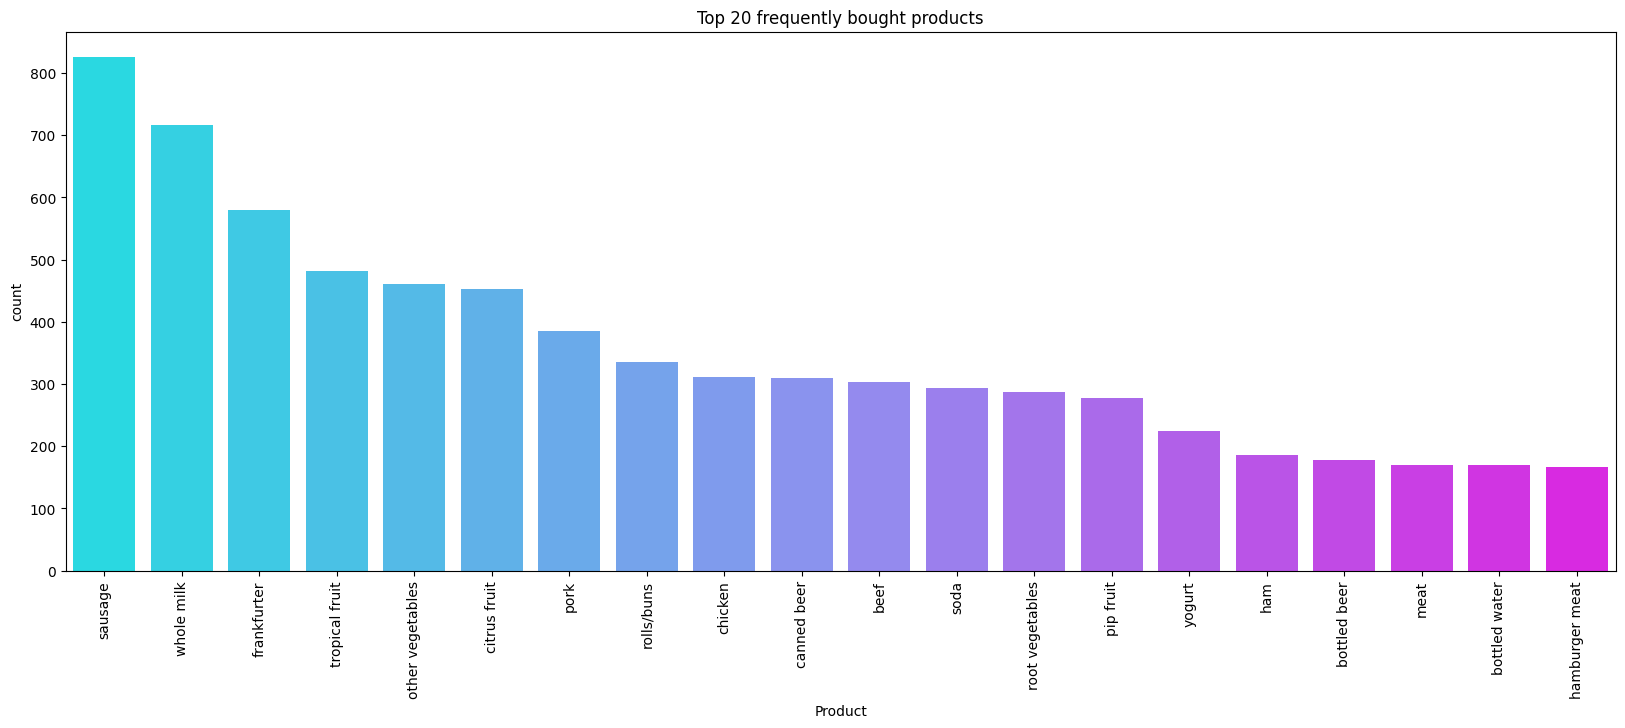

In [25]:
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=df, x=df['Item 1'],
             order = df['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

In [10]:
num_non_missing_per_transaction = df.iloc[:, 1:33].count(axis=1)

num_items_per_transaction = df["Item(s)"]

is_complete_transaction = (num_non_missing_per_transaction == num_items_per_transaction)

num_rows_with_missing_values = (~is_complete_transaction).sum()

print("Number of Rows with Missing Values (Mismatch in Number of Items):", num_rows_with_missing_values)

Number of Rows with Missing Values (Mismatch in Number of Items): 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


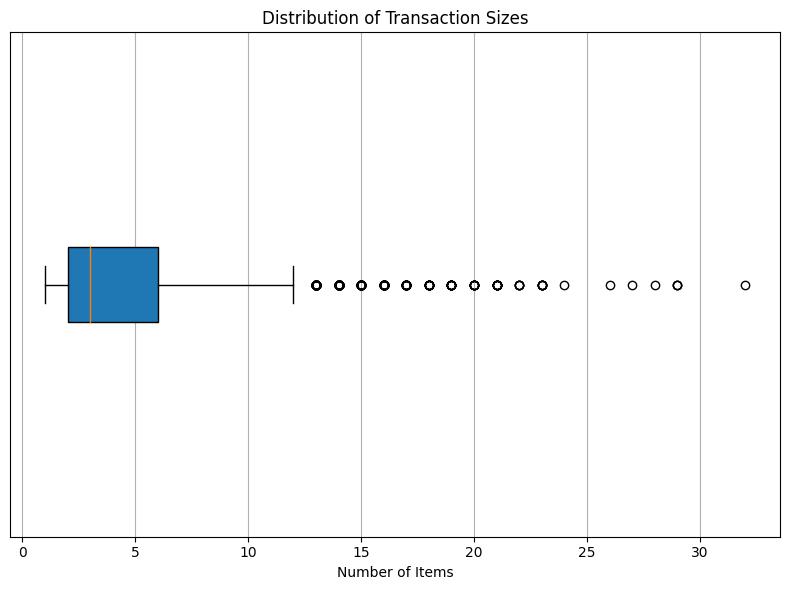

In [11]:
plt.figure(figsize=(8, 6))

plt.boxplot(num_items_per_transaction, vert=False, patch_artist=True)

plt.title("Distribution of Transaction Sizes")
plt.xlabel("Number of Items")
plt.grid(axis="x")
plt.yticks([])
plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


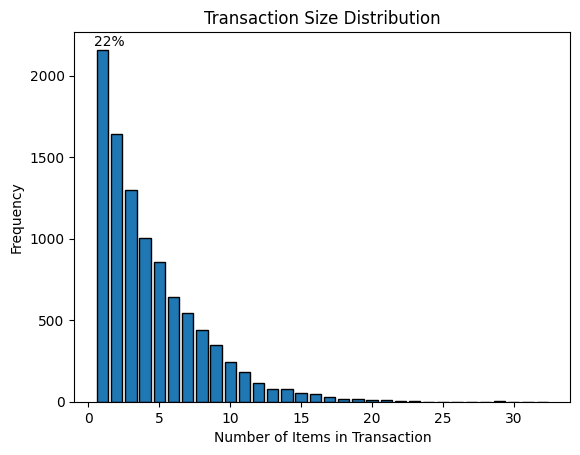

In [15]:
min_size = min(num_items_per_transaction)
max_size = max(num_items_per_transaction)

bins = list(range(min_size, max_size + 2))

plt.hist(num_items_per_transaction, bins=bins, edgecolor="black", align="left", rwidth=0.8)
plt.title("Transaction Size Distribution")
plt.xlabel("Number of Items in Transaction")
plt.ylabel("Frequency")

item_count = df["Item(s)"].value_counts()
total_transactions = len(df["Item(s)"])
percentage_item_purchases = (item_count / total_transactions) * 100

height_first_bar = plt.gca().patches[0].get_height()

plt.annotate(f"{round(percentage_item_purchases[1])}%",
             xy=(bins[0] + 0.5, height_first_bar),
             xytext=(0, 3),
             textcoords="offset points",
             ha='center',
             fontsize=10)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


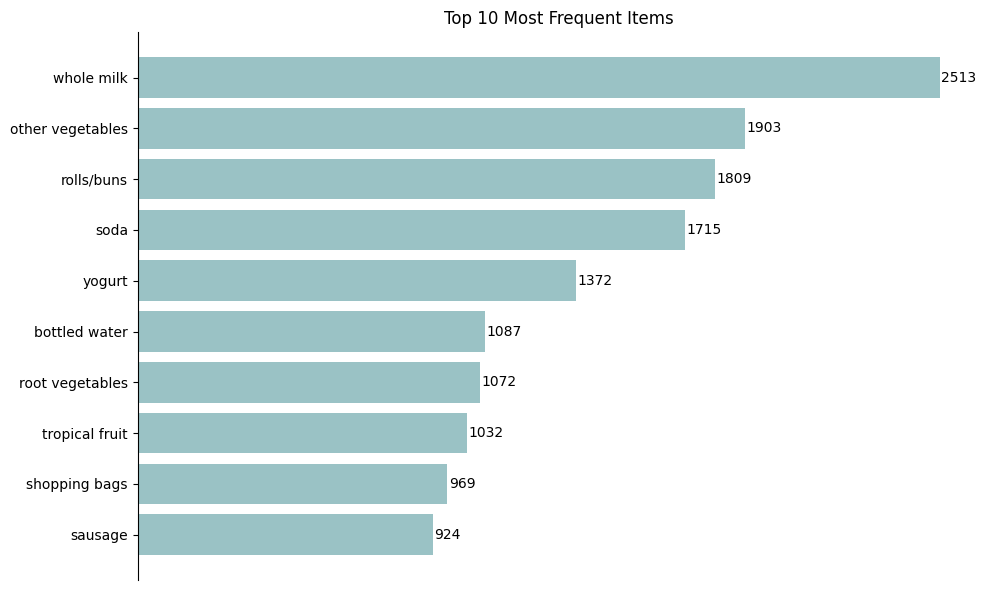

In [17]:
item_counts = df.iloc[:, 1:].stack().value_counts()

sorted_items_desc = item_counts.sort_values(ascending=False)

top_10_items = sorted_items_desc.head(10)

plt.figure(figsize=(10, 6))

bar_color = "#9AC2C5"

bars = plt.barh(range(len(top_10_items)), top_10_items.values, color=bar_color)

plt.yticks(range(len(top_10_items)), top_10_items.index)

plt.gca().invert_yaxis()

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)


plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

for index, value in enumerate(top_10_items.values):
    plt.text(value + 5, index, str(value), ha="left", va="center")


plt.grid(False)

plt.ylabel("")
plt.xlabel("")

plt.title("Top 10 Most Frequent Items")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


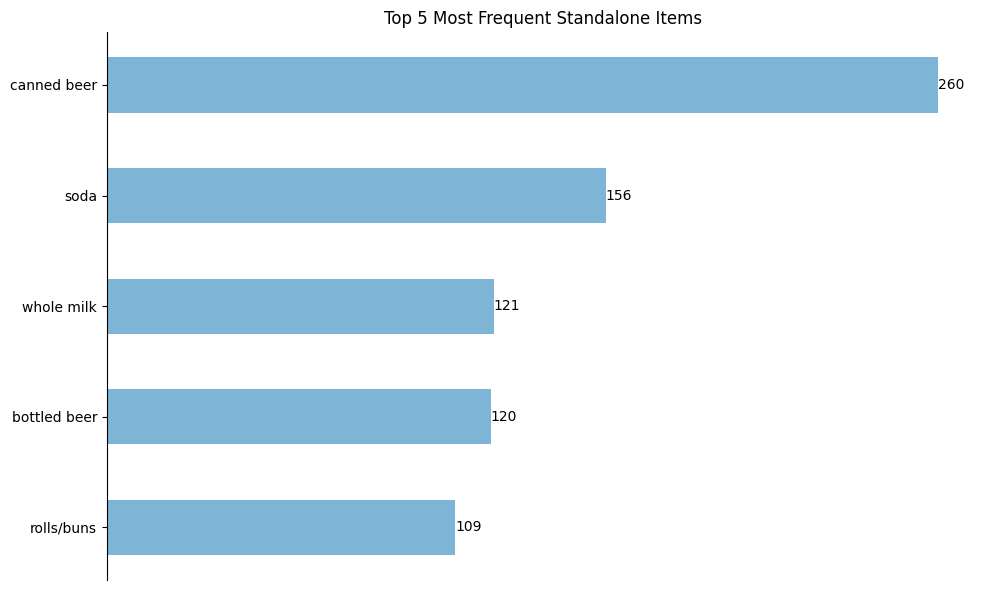

In [18]:
item_columns = df.columns[1:33]

standalone_purchases = df[df["Item(s)"] == 1][item_columns]

standalone_item_counts = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_item_counts.head(5)

plt.figure(figsize=(10, 6))


bar_color = "#7EB5D6"

plt.barh(top_standalone_items.index, top_standalone_items.values, color=bar_color, height=0.5)

plt.ylabel("")
plt.xlabel("")

plt.title("Top 5 Most Frequent Standalone Items")


for index, value in enumerate(top_standalone_items.values):
    plt.text(value, index, str(value), ha="left", va="center", color="black")

plt.gca().invert_yaxis()

plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

plt.grid(False)

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.tight_layout()

plt.show()

# modeling

In [27]:
item_columns = df.columns[1:33]

transactions = df[item_columns].apply(lambda row: row.dropna().tolist(), axis=1).tolist()

onehot_transactions = pd.DataFrame(transactions)

onehot_encoded = pd.get_dummies(onehot_transactions.unstack()).groupby(level=1).max()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

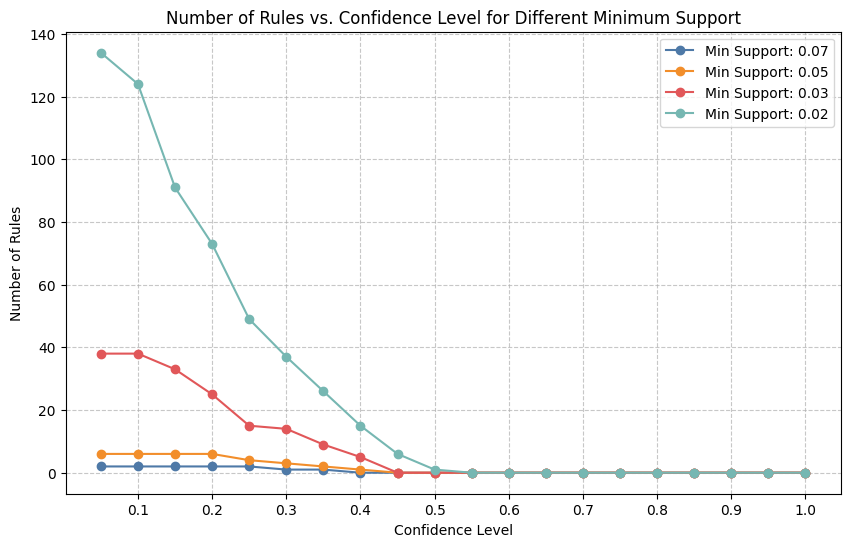

In [28]:
min_support_values = [0.07, 0.05, 0.03, 0.02]

confidence_levels = list(np.arange(0.05, 1.05, 0.05))

num_rules_lists = []

for min_support in min_support_values:
    frequent_itemsets = apriori(onehot_encoded, min_support=min_support, use_colnames=True)
    rules_list = []
    for confidence_level in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
        num_rules = len(rules)
        rules_list.append(num_rules)
    num_rules_lists.append(rules_list)

plt.figure(figsize=(10, 6))

colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"]

for i, min_support in enumerate(min_support_values):
    plt.plot(confidence_levels, num_rules_lists[i], marker="o", color=colors[i], label=f"Min Support: {min_support}")

plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Confidence Level for Different Minimum Support")

plt.xticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1])

plt.grid(True, linestyle="--", alpha=0.7)

plt.legend()
plt.show()

In [30]:
frequent_itemsets = apriori(onehot_encoded, min_support=0.03, use_colnames=True)

sorted_frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False).reset_index(drop=True)

sorted_frequent_itemsets["length"] = sorted_frequent_itemsets["itemsets"].apply(len)

with pd.option_context("display.max_rows", None,
                       "display.max_columns", None,
                       "display.precision", 3,
                       ):
  print(sorted_frequent_itemsets)

    support                             itemsets  length
0     0.256                         (whole milk)       1
1     0.193                   (other vegetables)       1
2     0.184                         (rolls/buns)       1
3     0.174                               (soda)       1
4     0.140                             (yogurt)       1
5     0.111                      (bottled water)       1
6     0.109                    (root vegetables)       1
7     0.105                     (tropical fruit)       1
8     0.099                      (shopping bags)       1
9     0.094                            (sausage)       1
10    0.089                             (pastry)       1
11    0.083                       (citrus fruit)       1
12    0.081                       (bottled beer)       1
13    0.080                         (newspapers)       1
14    0.078                        (canned beer)       1
15    0.076                          (pip fruit)       1
16    0.075       (other vegeta

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Visualisasi hasil algoritma

In [32]:
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

sorted_association_rules = association_rules_df.sort_values(by="lift", ascending=False).reset_index(drop=True)

print("\nAssociation Rules:")
sorted_association_rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents         consequents  antecedent support  \
0      (root vegetables)  (other vegetables)            0.108998   
1              (sausage)        (rolls/buns)            0.093950   
2       (tropical fruit)  (other vegetables)            0.104931   
3   (whipped/sour cream)        (whole milk)            0.071683   
4      (root vegetables)        (whole milk)            0.108998   
5               (yogurt)  (other vegetables)            0.139502   
6       (tropical fruit)        (whole milk)            0.104931   
7               (yogurt)        (whole milk)            0.139502   
8            (pip fruit)        (whole milk)            0.075648   
9     (other vegetables)        (whole milk)            0.193493   
10              (pastry)        (whole milk)            0.088968   
11        (citrus fruit)        (whole milk)            0.082766   
12       (bottled water)        (whole milk)            0.110524   
13          (rolls/buns)        (whole milk)            0.183935   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.193493  0.047382    0.434701  2.246605  0.026291    1.426693   
1             0.183935  0.030605    0.325758  1.771048  0.013324    1.210344   
2             0.193493  0.035892    0.342054  1.767790  0.015589    1.225796   
3             0.255516  0.032232    0.449645  1.759754  0.013916    1.352735   
4             0.255516  0.048907    0.448694  1.756031  0.021056    1.350401   
5             0.193493  0.043416    0.311224  1.608457  0.016424    1.170929   
6             0.255516  0.042298    0.403101  1.577595  0.015486    1.247252   
7             0.255516  0.056024    0.401603  1.571735  0.020379    1.244132   
8             0.255516  0.030097    0.397849  1.557043  0.010767    1.236375   
9             0.255516  0.074835    0.386758  1.513634  0.025394    1.214013   
10            0.255516  0.033249    0.373714  1.462587  0.010516    1.188729   
11            0.255516  0.030503    0.368550  1.442377  0.009355    1.179008   
12            0.255516  0.034367    0.310948  1.216940  0.006126    1.080446   
13            0.255516  0.056634    0.307905  1.205032  0.009636    1.075696   

    zhangs_metric  
0        0.622764  
1        0.480506  
2        0.485239  
3        0.465077  
4        0.483202  
5        0.439613  
6        0.409045  
7        0.422732  
8        0.387036  
9        0.420750  
10       0.347166  
11       0.334375  
12       0.200417  
13       0.208496

# save model (pickle)

In [ ]:
code 1

In [ ]:
code 2

In [ ]:
code 3